
### This HW is due on  11/10/2020 at 11:59 pm CST


You will be working with the movie data downloaded from here https://www.kaggle.com/karrrimba/movie-metadatacsv. Please follow the link and read more about it.

In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.cluster import KMeans

### Problem 1 [50]
Upload the movie data and do all the preliminary data analyses, such as finding and dealing with missing values, checking and correcting variable labels as numerical or categorical, etc. Our goal here is to train a CART classification model. Find the features you want to use. Use techniques we have learned in this class to select features that are important for a model. Here imdb_score is the dependent variable, but it has continuous values. To use a classification algorithm for this data, define a  new variable called 'imdb_labels' using 'imdb_score' in the following way.

imdb_score $\geq 8$ - excellent,

$6\leq$ imdb_score $<8$ - good,

$4\leq$ imdb_score $<6$ - average,

$2\leq$ imdb_score $<4$ - mediocre,

 imdb_score $<2$ - bad,
 
By dividing the data to test and train with a 70, 30 rule, train a CART classification model. Report the accuracy of the test data set, the confusion matrix, and the confusion matrix's heatmap plot. Please note that one of the major factors in grading this problem is your accuracy score on a test data set, so do what you can to raise it as high as possible.

In [2]:
movie = pd.read_csv('moviedata.csv')
numeric = movie.select_dtypes(['number'])
numeric.isna().sum()

num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        884
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [3]:
numericnona = numeric.dropna(axis='columns', thresh=4850)
numericnona = numericnona.dropna()
numericnona.isna().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [4]:
y=numericnona.imdb_score
x = numericnona[['num_critic_for_reviews', 'duration','director_facebook_likes',
                'actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users',
                 'cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews',
                 'title_year','actor_2_facebook_likes','movie_facebook_likes']]
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     195.1
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:42:12   Log-Likelihood:                -6438.0
No. Observations:                4857   AIC:                         1.290e+04
Df Residuals:                    4844   BIC:                         1.299e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        48.8314      2.315     21.090      0.000      44.292      53.371
num_critic_for_reviews        0.0025      0.000     13.820      0.000       0.002       0.003
duration                      0.0103      0.001     16.161      0.000       0.009       0.012
director_facebook_likes    4.397e-06   4.87e-06      0.902      0.367   -5.16e-06     1.4e-05
actor_3_facebook_likes        0.0001    2.2e-05      4.844      0.000    6.35e-05       0.000
actor_1_facebook_likes        0.0001   1.31e-05      7.976      0.000     7.9e-05       0.000
num_voted_users            3.303e-06   1.74e-07     18.997      0.000    2.96e-06    3.64e-06
cast_total_facebook_likes    -0.0001   1.31e-05     -7.876      0.000      -0.000   -7.74e-05
facenumber_in_poster         -0.0242      0.007     -3.644      0.000      -0.037      -0.011
num_user_for_reviews         -0.0007   6.07e-05    -11.097      0.000      -0.001      -0.001
title_year                   -0.0219      0.001    -19.000      0.000      -0.024      -0.020
actor_2_facebook_likes        0.0001   1.39e-05      7.477      0.000    7.67e-05       0.000
movie_facebook_likes      -1.588e-06   9.77e-07     -1.626      0.104    -3.5e-06    3.27e-07
==============================================================================
Omnibus:                      516.539   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              901.904
Skew:                          -0.730   Prob(JB):                    1.43e-196
Kurtosis:                       4.524   Cond. No.                     2.92e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
x1 = x[['num_critic_for_reviews', 'duration',
                'actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users',
                 'cast_total_facebook_likes','facenumber_in_poster',
                 'title_year','actor_2_facebook_likes','movie_facebook_likes']]
X1 = sm.add_constant(x1)
model1=sm.OLS(y,X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     216.2
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:42:12   Log-Likelihood:                -6499.8
No. Observations:                4857   AIC:                         1.302e+04
Df Residuals:                    4846   BIC:                         1.309e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        47.5529      2.337     20.351      0.000      42.972      52.134
num_critic_for_reviews        0.0019      0.000     10.775      0.000       0.002       0.002
duration                      0.0094      0.001     14.741      0.000       0.008       0.011
actor_3_facebook_likes        0.0001   2.23e-05      4.965      0.000    6.69e-05       0.000
actor_1_facebook_likes        0.0001   1.33e-05      8.161      0.000    8.24e-05       0.000
num_voted_users            2.072e-06   1.31e-07     15.857      0.000    1.82e-06    2.33e-06
cast_total_facebook_likes    -0.0001   1.32e-05     -8.038      0.000      -0.000   -8.04e-05
facenumber_in_poster         -0.0194      0.007     -2.893      0.004      -0.033      -0.006
title_year                   -0.0212      0.001    -18.249      0.000      -0.024      -0.019
actor_2_facebook_likes        0.0001   1.41e-05      7.675      0.000    8.04e-05       0.000
movie_facebook_likes        7.55e-07   9.66e-07      0.781      0.435   -1.14e-06    2.65e-06
==============================================================================
Omnibus:                      596.995   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1071.109
Skew:                          -0.812   Prob(JB):                    2.58e-233
Kurtosis:                       4.629   Cond. No.                     2.91e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
x2 = x[['num_critic_for_reviews', 'duration',
                'actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users',
                 'cast_total_facebook_likes','facenumber_in_poster',
                 'title_year','actor_2_facebook_likes']]
X2 = sm.add_constant(x2)
model1=sm.OLS(y,X2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     240.1
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:42:12   Log-Likelihood:                -6500.1
No. Observations:                4857   AIC:                         1.302e+04
Df Residuals:                    4847   BIC:                         1.309e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        47.3923      2.328     20.362      0.000      42.829      51.955
num_critic_for_reviews        0.0019      0.000     12.753      0.000       0.002       0.002
duration                      0.0094      0.001     14.765      0.000       0.008       0.011
actor_3_facebook_likes        0.0001   2.23e-05      5.001      0.000    6.77e-05       0.000
actor_1_facebook_likes        0.0001   1.33e-05      8.160      0.000    8.24e-05       0.000
num_voted_users             2.09e-06   1.29e-07     16.254      0.000    1.84e-06    2.34e-06
cast_total_facebook_likes    -0.0001   1.32e-05     -8.039      0.000      -0.000   -8.05e-05
facenumber_in_poster         -0.0192      0.007     -2.872      0.004      -0.032      -0.006
title_year                   -0.0212      0.001    -18.249      0.000      -0.023      -0.019
actor_2_facebook_likes        0.0001   1.41e-05      7.677      0.000    8.04e-05       0.000
==============================================================================
Omnibus:                      590.902   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1057.036
Skew:                          -0.806   Prob(JB):                    2.93e-230
Kurtosis:                       4.619   Cond. No.                     2.89e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
cond = [(numericnona['imdb_score'] < 2),
        (numericnona['imdb_score'] >= 2) & (numericnona['imdb_score'] < 4),
        (numericnona['imdb_score'] >= 4) & (numericnona['imdb_score'] < 6),
        (numericnona['imdb_score'] >= 6) & (numericnona['imdb_score'] < 8),
        (numericnona['imdb_score'] >= 8)]
value = ['bad','mediocre','average','good','excellent']
numericnona['imdb_labels']=np.select(cond,value)

In [8]:
x=x2
y=numericnona.imdb_labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
carttest = DecisionTreeClassifier()
carttest = carttest.fit(x_test, y_test)
test_pred = carttest.predict(x_test)
acc = metrics.accuracy_score(test_pred, y_test)
print("Test Set Accuracy:", acc)
cm = metrics.confusion_matrix(test_pred,y_test)
print(cm)

Test Set Accuracy: 1.0
[[394   0   0   0   0]
 [  0   3   0   0   0]
 [  0   0  85   0   0]
 [  0   0   0 932   0]
 [  0   0   0   0  44]]


Text(0.5, 1.0, 'Accuracy Score: 1.0')

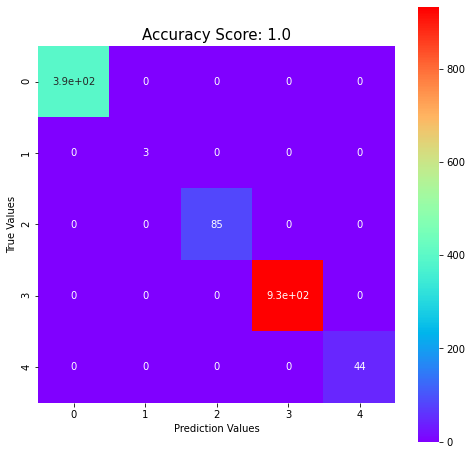

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, square=True, cmap='rainbow', annot=True)
plt.ylabel('True Values')
plt.xlabel('Prediction Values')
all_sample_title='Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size=15)

### Problem 2
Use the data you used in the final model in problem 1 for this problem. You will train a KMeans clustering model in this problem. Remove the imdb_score and imdb_labels as you do not need a dependent variable for the clustering model. Train the KMeans model (no need to split in test and train) and find 4 clusters. The clustering algorithm finds clusters, and you do not need to worry about the accuracy score here (needs more advanced concepts). Find a pair of variables ( x and y) among the ones you used for the KMeans model and plot 4 clusters with 4 different colors. Try various x and y  before settling on a graph that clearly shows 4 clusters on the graph.  Here is a reference material on KMeans from one of the reference textbooks we use. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

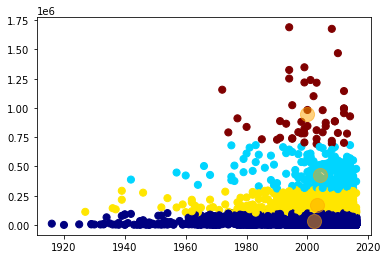

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
x=np.array(x)
plt.scatter(x[:, 7], x[:, 4], c=y_kmeans, s=50, cmap='jet')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 7], centers[:, 4], c='orange', s=200, alpha=0.5);